<a href="https://colab.research.google.com/github/hajyhia/Plant-Diseases-Classification/blob/main/ai_crops_detectetion_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'username'
os.environ['KAGGLE_KEY'] = 'key'

from google.colab import files
files.upload()

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 98% 2.65G/2.70G [00:05<00:00, 460MB/s]
100% 2.70G/2.70G [00:05<00:00, 505MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d new-plant-diseases-dataset/

Streaming output truncated to the last 5000 lines.
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Stra

In [ ]:
!rm -rf '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)'

# ***Import Libarys***

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetV2L

import random
import os
import warnings
warnings.filterwarnings('ignore')
print('compelet')

compelet


# ***Data understanding & Visualizatio***

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
image_shape = (224, 224)
batch_size = 64
epochs = 10  # Adjust as needed
data_path = '/content/new-plant-diseases-dataset/'

# Paths (make sure data_path is defined)
train_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'train')
valid_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'valid')

# Image generators
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load training data
print("Training Images:")
train_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

# Load validation data
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

# Load test data (separate validation folder)
print("Test Images:")
test_data = test_datagen.flow_from_directory(valid_folder,
                                             target_size=image_shape,
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)



Training Images:
Found 56251 images belonging to 38 classes.
Validating Images:
Found 14044 images belonging to 38 classes.
Test Images:
Found 17572 images belonging to 38 classes.


***From previous cell we know that we have 38 class***
> * 56251 images in train data
> * 14044 images in valisation data
> * 17572 images in test data
> * 33 imgeas in test data (the label of test data is the name of image) we will uses them to predict later

***But what are 38 classes ?!***

In [ ]:
# show how data store
images, labels = next(iter(train_data))
print(f'shape of image is : {images[0].shape}')


shape of image is : (224, 224, 3)


In [ ]:
# Show all diseases (class names) in the dataset
diseases = os.listdir(train_folder)
print(f"Diseases in dataset {len(diseases)}:")
print(diseases)

Diseases in dataset 38:
['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Blueberry___healthy', 'Tomato___Target_Spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Early_blight', 'Tomato___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Cherry_(including_sour)___healthy', 'Tomato___Leaf_Mold', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Potato___healthy', 'Apple___Apple_scab', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Grape___Black_rot', 'Corn_(maize)___Common_rust_', 'Peach___Bacterial_spot', 'Tomato___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Soybean___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Lea

***We notice that we have the same plant in different class such as:***
 > * Tomato___Early_blight
 > * Tomato___Late_blight
 > * Tomato___healthy
 > * ...

***so we need to know what is the different type of plant we have***

In [ ]:
# identify uniqe plant in dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
print(f'number of different plants is :{len(plants)}')
print(plants)

number of different plants is :14
['Apple', 'Grape', 'Blueberry', 'Tomato', 'Orange', 'Cherry_(including_sour)', 'Squash', 'Raspberry', 'Pepper,_bell', 'Potato', 'Corn_(maize)', 'Peach', 'Soybean', 'Strawberry']


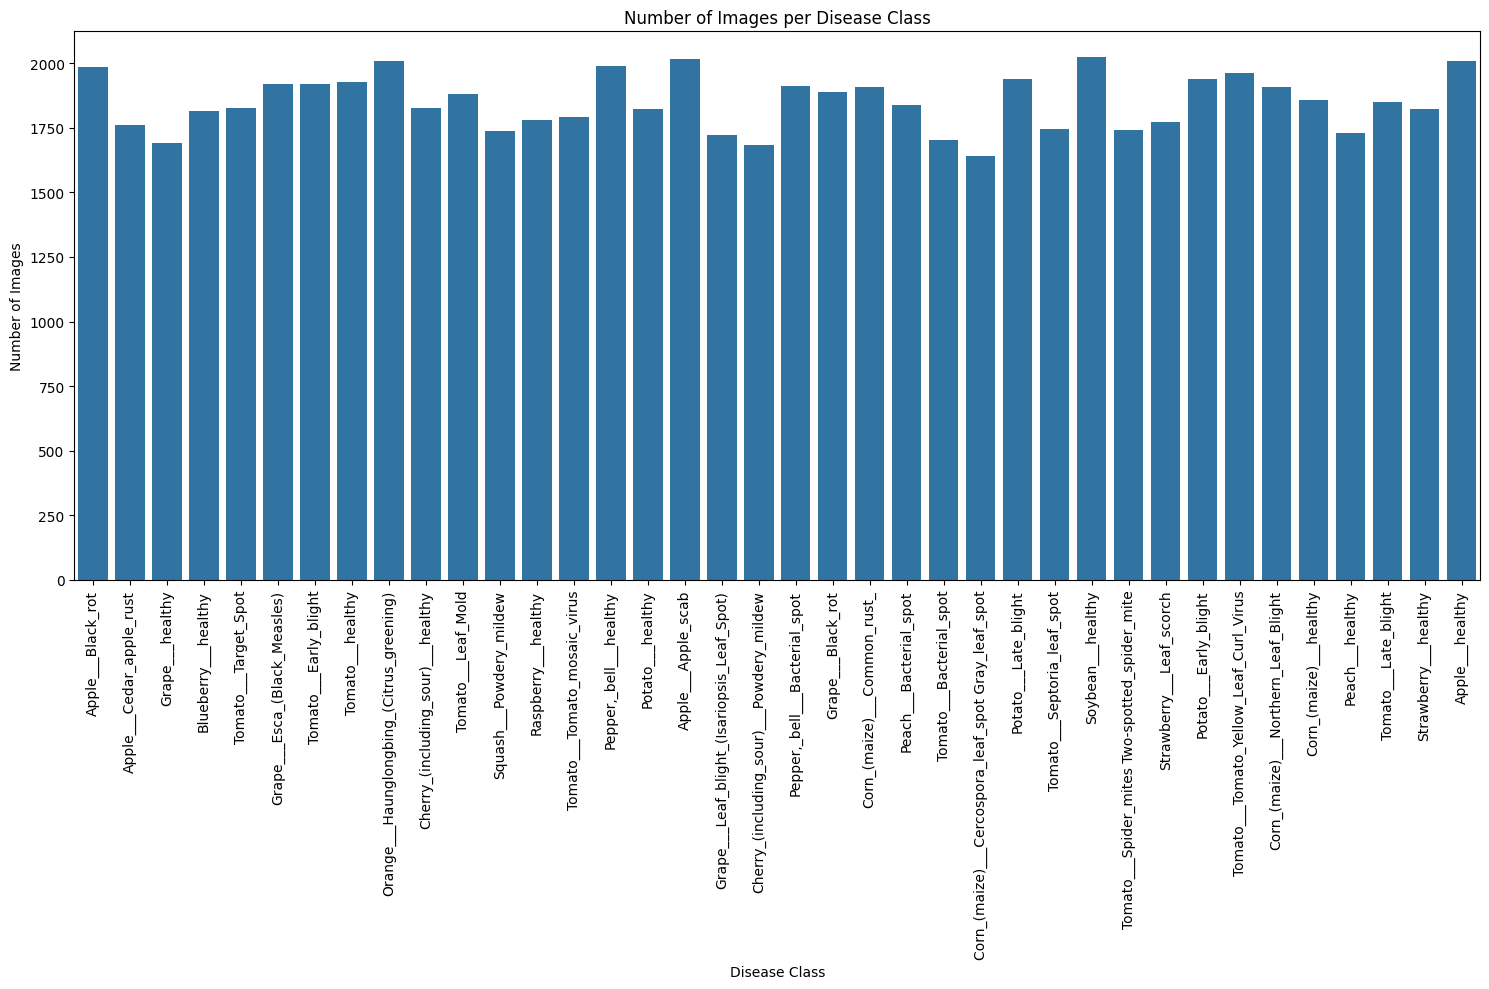

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dictionary of class counts
dic = {}
for disease_class in diseases:
    class_path = os.path.join(train_folder, disease_class)
    dic[disease_class] = len(os.listdir(class_path))

# Convert to DataFrame
df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# Optional: sort by number of images
# df = df.sort_values(by="Number of Images", ascending=False)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Disease Class', y='Number of Images')
plt.xticks(rotation=90)
plt.title("Number of Images per Disease Class")
plt.tight_layout()
plt.show()


***As we notice that classes are somewhat balanced***

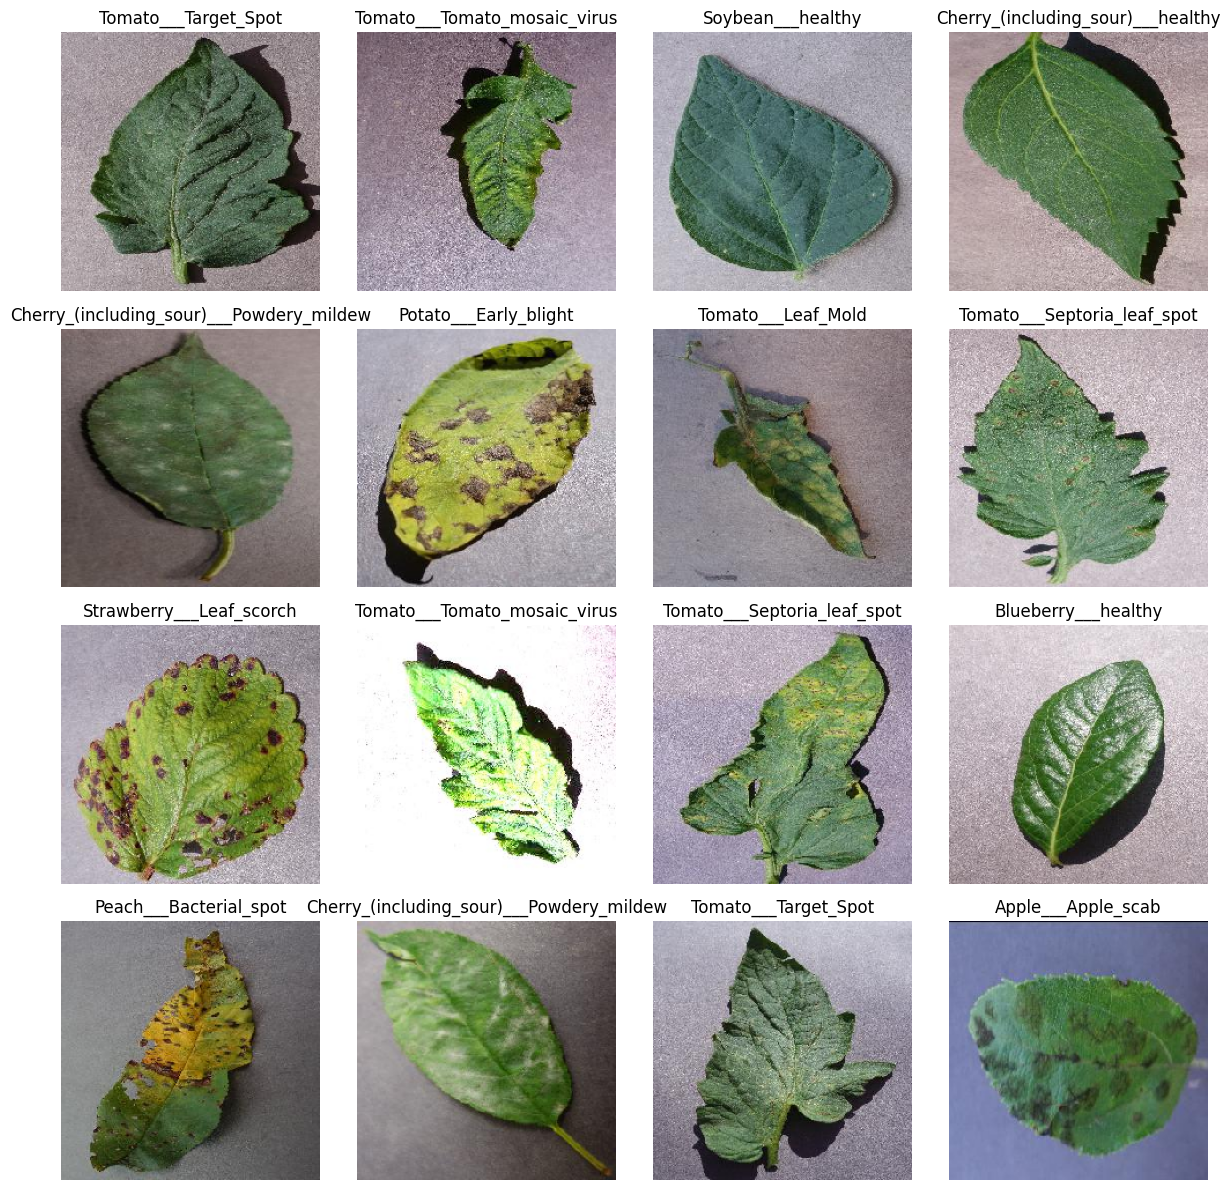

In [ ]:
import random
import numpy as np

# select a specific batch
images, labels = next(iter(train_data))

# select 16 image by random
indices = random.sample(range(len(images)), 16)
selected_images = images[indices]
selected_labels = labels[indices]

class_names = list(train_data.class_indices.keys())

# plotting
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()


# ***Modeling***

***Function will be used***

Learning curve function
> * learning curve
> * loss curve

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    # accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


Prediction function
> Compare Truth label (name of image ) with predicted label

In [ ]:
def predict_labels_and_display(model_path, test_dir='/content/new-plant-diseases-dataset/test/test', image_size=(224, 224)):
    # load the best model
    best_model = load_model(model_path)

    true_labels = []
    predicted_labels = []
    images = []

    for filename in os.listdir(test_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # load test images
            img_path = os.path.join(test_dir, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # predict
            prediction = best_model.predict(img_array, verbose=0)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # extract the label (name of image)
            true_label = filename.split('.')[0]

            # get the prediction class
            class_labels = list(train_data.class_indices.keys())
            predicted_label = class_labels[predicted_class]

            true_labels.append(true_label)
            predicted_labels.append(predicted_label)
            images.append(img)

    # randomly select three images
    selected_indices = random.sample(range(len(images)), 3)

    # show selected images
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(f'True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
diseases_class = list(train_data.class_indices.keys())

with open("/content/diseases_labels", "w") as f:
    for itm in diseases_class:
        f.write(itm + "\n")

In [27]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [26]:
# tf.debugging.set_log_device_placement(False)

# # This operation should run on GPU
# a = tf.constant([[1.0, 2.0]])
# b = tf.constant([[3.0], [4.0]])
# c = tf.matmul(a, b)

# print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([[11.]], shape=(1, 1), dtype=float32)


# ***CNN Model***

In [ ]:
# Model Architecture
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

In [ ]:
# train the model
model_checkpoint = ModelCheckpoint('/content/working/cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=20,
                    batch_size=64,
                    callbacks=[model_checkpoint, early_stopping])

In [ ]:
#  save model to use later
model.save('/content/ai_crops_model.keras')

In [ ]:
# model.save('/content/drive/My Drive/DeepLearning_CNN/ai_crops_model_.keras')

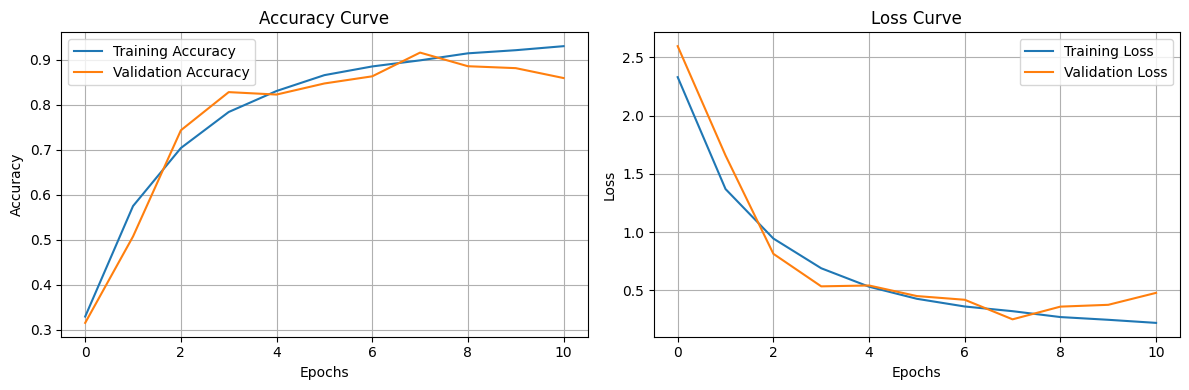

In [24]:
plot_learning_curves(history)

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/ai_crops_model.keras')

# best_model = load_model('/content/drive/My Drive/DeepLearning_CNN/ai_crops_model.keras')
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
# show random sample of prediction of model on test data
predict_labels_and_display('/content/ai_crops_model.keras')
# predict_labels_and_display('/content/drive/My Drive/DeepLearning_CNN/ai_crops_model.keras')

Prepare Streamlit app

In [29]:
!pip install streamlit pyngrok
!pip install streamlit
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [4]:
import os
import gdown

file_id = '1ArPM3W6AxKOEAy823-YXLTgE7O51FEd3'# '1m9OE6332qORvAMsoctDS7JofrbiVsk6R'  # replace with your actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'

os.makedirs('/content/working', exist_ok=True)

# Output file name
output = '/content/working/diseases_labels'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)
  print(f"\nDownloading File {output} ...")
else:
  print(f"File found at {output}")

with open(output, "r") as f:
  class_labels = [line.strip() for line in f ]

print('\n'.join(class_labels))

File found at /content/working/diseases_labels
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato

In [33]:
%%writefile app.py
import streamlit as st
from PIL import Image
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import tempfile
import os
import numpy as np
import gdown

st.title("Crop Disease Detection")


file_id = '1ArPM3W6AxKOEAy823-YXLTgE7O51FEd3'# '1m9OE6332qORvAMsoctDS7JofrbiVsk6R'  # replace with your actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output file name
output = 'diseases_labels'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)
  st.write(f"Downloading File {output} ...")
else:
  st.write(f"File found at {output}")

with open(output, "r") as f:
  class_labels = [line.strip() for line in f ]

file_id = '1IsZ2HP579LtWvQfmMp3fGMFiDaJfrWS5'  # replace with your actual file ID
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output file name
output = 'ai_crops_model.keras'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)
  st.write(f"Downloading File {output} ...")
else:
  st.write(f"File found at {output}")

if os.path.exists(output):
  # st.write(f"Attempting to load the model {output}.")
  st.write("Attempting to load the Crop Disease Detection Model.")

  model = load_model(output)
  st.success("The Crop Disease Detection Model loaded successfully!")
  # st.write("Model summary:")

  # # Display model summary as text
  # stringlist = []
  # model.summary(print_fn=lambda x: stringlist.append(x))
  # summary = "\n".join(stringlist)
  # st.text(summary)

else:
  st.error(f"File not found at {output}")

  # Optionally remove the temp file
  # os.remove(tmp_path)


# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# If an image is uploaded
if uploaded_file is not None:
    # Open the image
    image = Image.open(uploaded_file)

    # Display image details
    st.write("**Filename:**", uploaded_file.name)
    st.write("**Format:**", image.format)
    st.write("**Size:**", image.size)

    # Show the image
    st.image(image, caption="Uploaded Image")

    # Resize to model's expected input size
    target_size = model.input_shape[1:3]  # (height, width)
    image = image.resize(target_size)

    img_array = np.array(image) / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # extract the label (name of image)
    true_label = uploaded_file.name.split('.')[0]

    # get the prediction class
    # class_labels = list(train_data.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    st.write(f"**True Label:** {true_label}")
    st.write(f"**predicted_class:** {predicted_class}")
    st.success(f"**Predicted Crop Disease:** {predicted_label}")


Writing app.py


In [35]:
# Run Streamlit in the background
!streamlit run app.py &> /dev/null &

In [34]:
!pkill streamlit

In [37]:
os.environ["PYNGROK_AUTH_TOKEN"] = "2qcUGt9fCxy5WOjkYKr8jFezsIi_28X6rg2bmAAV3MeUBNWRV"

In [38]:
from pyngrok import ngrok
import os
import subprocess

# Kill any existing tunnels
ngrok.kill()

# ngrok_authtoken = os.environ.get("NGROK_AUTHTOKEN", "cr_2qcUGt9fCxy5WOjkYKr8jFezsIi") # Consider setting NGROK_AUTHTOKEN as an environment variable
ngrok_authtoken = os.getenv("PYNGROK_AUTH_TOKEN")


# Set the ngrok authtoken
try:
    ngrok.set_auth_token(ngrok_authtoken)
    print("Ngrok authtoken set successfully.")

    # Open a tunnel to streamlit port 8501
    http_tunnel = ngrok.connect(8501)
    print("Public URL:", http_tunnel.public_url)
except Exception as e:
    print(f"Error setting ngrok authtoken: {e}")
    # Handle the error appropriately, e.g., exit or prompt the user

# # Start Streamlit app
# subprocess.Popen(["streamlit", "run", "main.py"])


Ngrok authtoken set successfully.
Public URL: https://30b4-34-10-102-142.ngrok-free.app
